In [1]:
import os
os.chdir('/data/core-kind/fatemeh/codes/data_exploration')

In [2]:
# find a dicom with opt modality
# load label file
# find its label
# load the image, visualize

# test connecting to s3

In [2]:
pip install boto3


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 3.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 85.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 16.0 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.2.1
    Uninstalling urllib3-2.2.1:
      Successfully uninstalled urllib3-2.2.1
Note: you may need to restart the kernel to use updated packages.


In [3]:
import boto3
import os
import pydicom
import pandas as pd
from tqdm import tqdm  # Import tqdm for progress bar

In [4]:
s3 = boto3.client('s3',
                  aws_secret_access_key='SzaxXKo59U7zLolqaSZ9ft0802JBXXZR/1hx1dyo',
                  aws_access_key_id='GXMPQ5T9K9BJ80XKJ5OY',
                  endpoint_url='https://s3-medver.med.uni-muenchen.de')

/data/core-kind/fatemeh/miniconda3/envs/retfound/lib/python3.7/site-packages/boto3/compat.py:82: PythonDeprecationWarning: Boto3 will no longer support Python 3.7 starting December 13, 2023. To continue receiving service updates, bug fixes, and security updates please upgrade to Python 3.8 or later. More information can be found here: https://aws.amazon.com/blogs/developer/python-support-policy-updates-for-aws-sdks-and-tools/
  warnings.warn(warning, PythonDeprecationWarning)


In [5]:
paginator = s3.get_paginator('list_objects_v2')
bucket_name = 'scivias-eyeimages'
page_iterator = paginator.paginate(Bucket=bucket_name)

In [6]:

import read_data
import importlib

/data/core-kind/fatemeh/miniconda3/envs/retfound/lib/python3.7/site-packages/boto3/compat.py:82: PythonDeprecationWarning: Boto3 will no longer support Python 3.7 starting December 13, 2023. To continue receiving service updates, bug fixes, and security updates please upgrade to Python 3.8 or later. More information can be found here: https://aws.amazon.com/blogs/developer/python-support-policy-updates-for-aws-sdks-and-tools/
  warnings.warn(warning, PythonDeprecationWarning)


In [68]:

importlib.reload(read_data)
from read_data import *

In [13]:
page = next(iter(page_iterator))

In [14]:
'Contents' in page

True

In [69]:
meta_df = []
if 'Contents' in page:
    for obj in tqdm(page['Contents'], desc="Processing DICOM files"):
        key = obj['Key']
        if key.lower().endswith('.dcm'):
            file = download_file(bucket_name, key)
            meta = process_single_dicom(file, './')
            if meta is not None:
                meta_df.append(meta)

Processing DICOM files: 100%|██████████| 1000/1000 [09:56<00:00,  1.68it/s]


In [70]:
len(meta_df)

51

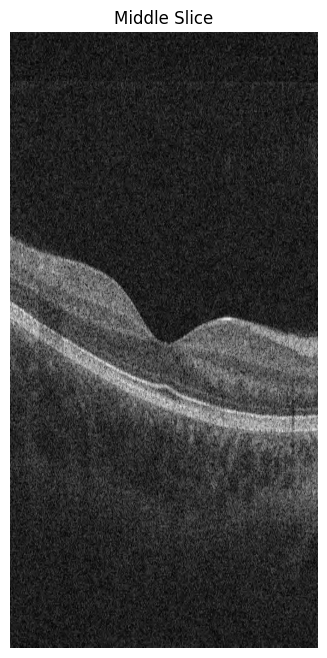

In [63]:
image_path = './1.2.276.0.75.2.2.42.50126425987.20210118121227438.5984172510.2.dcm_middle_slice_rgb.jpg'
# Open the image
img = Image.open(image_path)

# Display the image
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.title("Middle Slice")
plt.axis("off")
plt.show()

In [58]:
pixel_array.shape

(128, 1024, 512)

In [66]:
dicom.PatientName

'KK-SCIVIAS-00004^JJ'

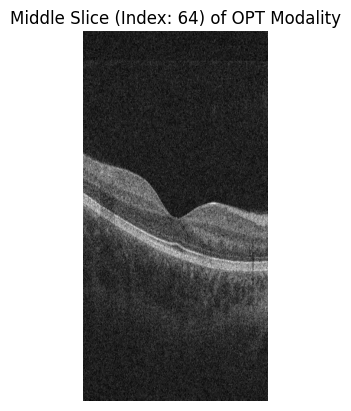

In [41]:
import matplotlib.pyplot as plt

# Check if the data is 3D (multi-frame)
if pixel_array.ndim != 3:
    raise ValueError(f"Expected a 3D DICOM file, but got a {pixel_array.ndim}D file.")

# Get the middle slice
middle_index = pixel_array.shape[0] // 2
middle_slice = pixel_array[middle_index]

# Visualize the middle slice
# plt.figure(figsize=(8, 8))
plt.imshow(middle_slice, cmap="gray")
plt.title(f"Middle Slice (Index: {middle_index}) of OPT Modality")
plt.axis("off")
plt.show()

In [45]:
pixel_array.min(), pixel_array.max()

(0, 245)

In [46]:
hasattr(dicom, "pixel_array")

True

In [47]:
ls

__pycache__/  analyse_dicoms.py  files/  read_data.py


# process all dicoms

In [2]:
import importlib
import process_dicoms
importlib.reload(process_dicoms)
from process_dicoms import *

In [3]:
opt = pd.read_csv('files/opt.csv', index_col=0)


In [4]:
processor = DicomProcessor('/data/core-kind/fatemeh/data/SCIAVIAS2/', opt)

/data/core-kind/fatemeh/miniconda3/envs/retfound/lib/python3.7/site-packages/boto3/compat.py:82: PythonDeprecationWarning: Boto3 will no longer support Python 3.7 starting December 13, 2023. To continue receiving service updates, bug fixes, and security updates please upgrade to Python 3.8 or later. More information can be found here: https://aws.amazon.com/blogs/developer/python-support-policy-updates-for-aws-sdks-and-tools/
  warnings.warn(warning, PythonDeprecationWarning)


In [5]:
processor.process_all()

process zeiss, valid opt


100%|██████████| 4576/4576 [35:26<00:00,  2.15it/s] 


In [27]:
processor.process_all()

process with df


Processing DICOM files of page 0:   0%|          | 0/1000 [00:00<?, ?it/s]

not dcm key: ExportHelmholtzRaw-kStBI2ovv5/


Processing DICOM files of page 0: 100%|██████████| 1000/1000 [10:00<00:00,  1.67it/s]


51 948


Processing DICOM files of page 1: 100%|██████████| 1000/1000 [19:15<00:00,  1.16s/it]


152 1847


Processing DICOM files of page 2: 100%|██████████| 1000/1000 [18:52<00:00,  1.13s/it]


253 2746


Processing DICOM files of page 3: 100%|██████████| 1000/1000 [18:47<00:00,  1.13s/it]


371 3628


Processing DICOM files of page 4:  93%|█████████▎| 930/1000 [17:25<00:26,  2.65it/s]

not dcm key: Part1/


Processing DICOM files of page 4: 100%|██████████| 1000/1000 [17:40<00:00,  1.06s/it]


467 4531


Processing DICOM files of page 5: 100%|██████████| 1000/1000 [12:40<00:00,  1.32it/s]


529 5469


Processing DICOM files of page 6: 100%|██████████| 1000/1000 [18:42<00:00,  1.12s/it]


637 6361


Processing DICOM files of page 7: 100%|██████████| 1000/1000 [19:28<00:00,  1.17s/it]


756 7242


Processing DICOM files of page 8: 100%|██████████| 1000/1000 [18:53<00:00,  1.13s/it]


863 8135


Processing DICOM files of page 9:   8%|▊         | 75/1000 [00:34<01:50,  8.39it/s]

not dcm key: Part2/


Processing DICOM files of page 9: 100%|██████████| 1000/1000 [17:55<00:00,  1.08s/it]


958 9039


Processing DICOM files of page 10: 100%|██████████| 1000/1000 [18:46<00:00,  1.13s/it]


1057 9940


Processing DICOM files of page 11: 100%|██████████| 1000/1000 [18:40<00:00,  1.12s/it]


1158 10839


Processing DICOM files of page 12: 100%|██████████| 1000/1000 [18:34<00:00,  1.11s/it]


1263 11734


Processing DICOM files of page 13:   3%|▎         | 34/1000 [00:36<20:31,  1.27s/it]

not dcm key: Part3/


Processing DICOM files of page 13: 100%|██████████| 1000/1000 [18:36<00:00,  1.12s/it]


1363 12633


Processing DICOM files of page 14: 100%|██████████| 1000/1000 [23:00<00:00,  1.38s/it]


1469 13527


Processing DICOM files of page 15: 100%|██████████| 1000/1000 [18:29<00:00,  1.11s/it]


1569 14427


Processing DICOM files of page 16: 100%|██████████| 1000/1000 [18:51<00:00,  1.13s/it]


1675 15321


Processing DICOM files of page 17: 100%|██████████| 1000/1000 [19:08<00:00,  1.15s/it]


1780 16216


Processing DICOM files of page 18: 100%|██████████| 358/358 [06:50<00:00,  1.15s/it]


not dcm key: test.txt
1816 16537


In [1]:
import pandas as pd

In [3]:
path = '/data/core-kind/fatemeh/codes/data_exploration/images/meta.csv'

df = pd.read_csv(path, index_col=0)
df.head()

,Filename,Status,Modality,SOPClassUID,Laterality,PatientName
0,1.2.276.0.75.2.2.42.50126425987.20210118121227...,Saved,OPT,1.2.840.10008.5.1.4.1.1.77.1.5.4,R,KK-SCIVIAS-00004^JJ
1,1.2.276.0.75.2.2.42.50126425987.20210118121511...,Saved,OPT,1.2.840.10008.5.1.4.1.1.77.1.5.4,L,KK-SCIVIAS-00004^JJ
2,1.2.276.0.75.2.2.42.50126425987.20210120100105...,Saved,OPT,1.2.840.10008.5.1.4.1.1.77.1.5.4,R,KK-SCIVIAS-00011^GM
3,1.2.276.0.75.2.2.42.50126425987.20210120100628...,Saved,OPT,1.2.840.10008.5.1.4.1.1.77.1.5.4,L,KK-SCIVIAS-00011^GM
4,1.2.276.0.75.2.2.42.50126425987.20210120131545...,Saved,OPT,1.2.840.10008.5.1.4.1.1.77.1.5.4,R,KK-SCIVIAS-00010^GM


In [4]:
len(df)

1810

# check data imbalance

In [27]:
import imbalance
importlib.reload(imbalance)
from imbalance import *

In [28]:
label_mapping = {
    'Chronic post-COVID-19 syndrome': 'Post-COVID syndrome',
    'Short stature disorder': 'Short stature',
    'Disorder of immune function': 'Immune disorder',
    'Growth hormone deficiency': 'GH deficiency',
    'Chronic ulcerative colitis': 'Ulcerative colitis',
    'Adrenogenital disorder': 'Adrenogenital disorder',
    'Well child (finding)': 'Well child',
    'Periodic fever and aphthous stomatitis with pharyngitis and cervical lymphadenitis syndrome': 'PFAPA syndrome',
    'Celiac disease': 'Celiac disease',
    'Functional abdominal pain syndrome': 'Abdominal pain syndrome',
    'Diabetes mellitus type 1': 'Type 1 diabetes',
    'Cystic fibrosis': 'Cystic fibrosis',
    'Hereditary von Willebrand disease type 1': 'von Willebrand disease',
    'Factor VII deficiency': 'Factor VII deficiency',
    'Familial Mediterranean fever': 'Mediterranean fever',
    'Juvenile idiopathic arthritis, oligoarthritis': 'Juvenile arthritis',
    "Crohn's disease": 'Crohn’s disease',
    'Hereditary factor VIII deficiency disease': 'Factor VIII deficiency',
    'Prader-Willi syndrome': 'Prader-Willi',
    'Asthma': 'Asthma'
}


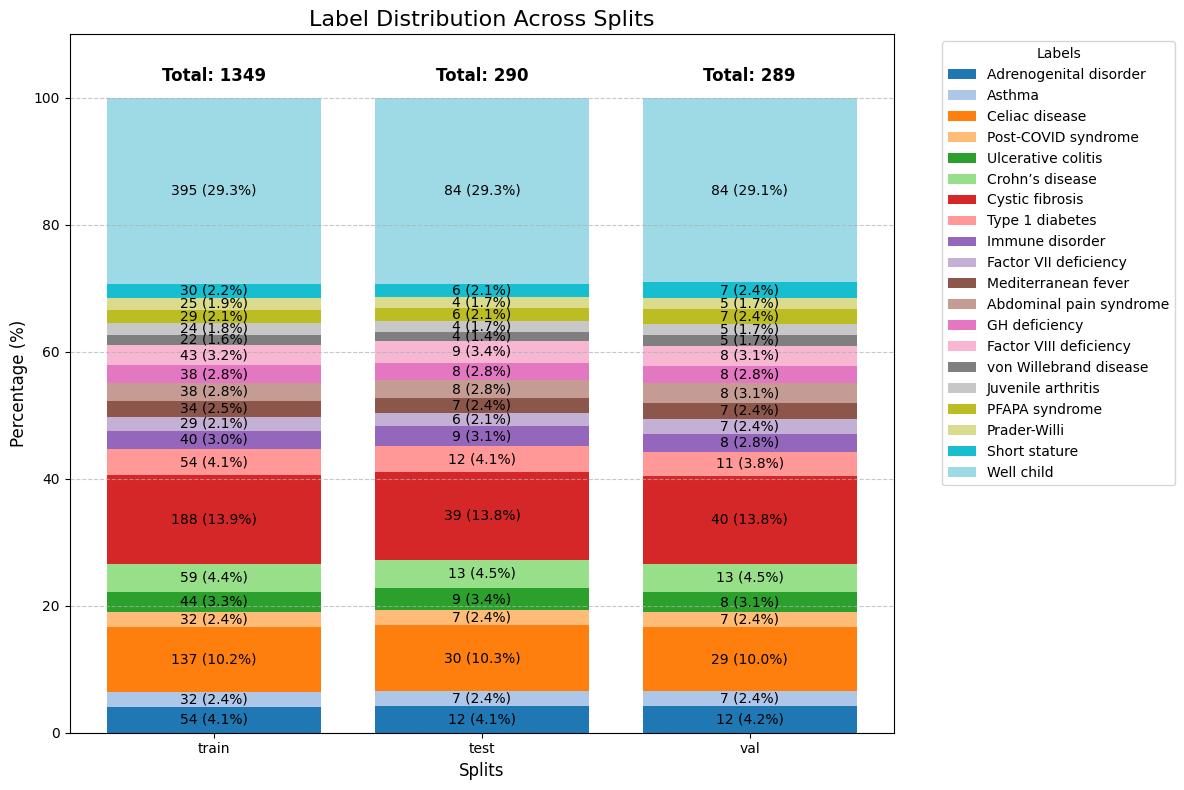

In [29]:
path = '/data/core-kind/fatemeh/data/opt/splits'
plot_label_distribution_stacked(path, 'disease_en', label_mapping)

In [14]:
train = pd.read_csv('/data/core-kind/fatemeh/data/opt/splits/train.csv')
train.head()

,studyid,disease_en,subdiscipline,Filename,SOPClassUID,Modality,Laterality
0,KK-SCIVIAS-01084,Chronic post-COVID-19 syndrome,infectiology,1.2.276.0.75.2.2.42.50126425987.20220304104008...,1.2.840.10008.5.1.4.1.1.77.1.5.4,OPT,L
1,KK-SCIVIAS-00909,Short stature disorder,endocrinology,1.2.276.0.75.2.2.42.50126425987.20220117145352...,1.2.840.10008.5.1.4.1.1.77.1.5.4,OPT,L
2,KK-SCIVIAS-00468,Disorder of immune function,immunology/rheumatology,1.2.276.0.75.2.2.42.50126425987.20231024112959...,1.2.840.10008.5.1.4.1.1.77.1.5.4,OPT,R
3,KK-SCIVIAS-03249,Growth hormone deficiency,endocrinology,1.2.276.0.75.2.2.42.50126425987.20231019130400...,1.2.840.10008.5.1.4.1.1.77.1.5.4,OPT,L
4,KK-SCIVIAS-03131,Chronic ulcerative colitis,gastroenterology,1.2.276.0.75.2.2.42.50126425987.20230912103640...,1.2.840.10008.5.1.4.1.1.77.1.5.4,OPT,L


In [16]:
train.disease_en.unique()

array(['Chronic post-COVID-19 syndrome', 'Short stature disorder',
       'Disorder of immune function', 'Growth hormone deficiency',
       'Chronic ulcerative colitis', 'Adrenogenital disorder',
       'Well child (finding)',
       'Periodic fever and aphthous stomatitis with pharyngitis and cervical lymphadenitis syndrome',
       'Celiac disease', 'Functional abdominal pain syndrome',
       'Diabetes mellitus type 1', 'Cystic fibrosis',
       'Hereditary von Willebrand disease type 1',
       'Factor VII deficiency', 'Familial Mediterranean fever',
       'Juvenile idiopathic arthritis, oligoarthritis', "Crohn's disease",
       'Hereditary factor VIII deficiency disease',
       'Prader-Willi syndrome', 'Asthma'], dtype=object)

# confustion plot test

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

def plot_confusion_matrix_with_counts(data_loader, true_labels, pred_labels, task, mode):
    """
    Plots a confusion matrix with counts and normalized percentages for a multi-class classification task.

    Args:
        data_loader (DataLoader): PyTorch DataLoader used for the task.
        true_labels (list): True labels of the data.
        pred_labels (list): Predicted labels of the data.
        task (str): Path or name of the task folder for saving the plot.
        mode (str): Mode (e.g., 'train', 'test', 'val') for labeling the plot file.

    Returns:
        None
    """
    # Access class names from the DataLoader
    dataset = data_loader.dataset
    if hasattr(dataset, 'classes'):
        class_names = dataset.classes
    else:
        raise AttributeError("The dataset does not have a 'classes' attribute.")

    # Compute the confusion matrix
    cm = confusion_matrix(true_labels, pred_labels, labels=range(len(class_names)))

    # Normalize confusion matrix
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cm_normalized = np.nan_to_num(cm_normalized)  # Handle NaNs for empty classes

    # Plot confusion matrix
    fig, ax = plt.subplots(figsize=(12, 10))  # Adjust size for readability
    sns.heatmap(
        cm_normalized,
        annot=False,  # Turn off default annotations to customize them
        cmap="Blues",
        xticklabels=class_names,
        yticklabels=class_names,
        cbar_kws={'label': 'Normalized Value (%)'},
        linewidths=0.5,
        ax=ax
    )

    # Add custom annotations: "count (percentage)"
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            count = cm[i, j]
            percentage = cm_normalized[i, j] * 100
            label = f"{count} ({percentage:.1f}%)"
            ax.text(
                j + 0.5, i + 0.5,
                label,
                ha='center',
                va='center',
                color='black',
                fontsize=10
            )

    # Customize plot
    ax.set_title(f"Confusion Matrix ({mode.capitalize()})", fontsize=16)
    ax.set_xlabel("Predicted Labels", fontsize=14)
    ax.set_ylabel("True Labels", fontsize=14)
    plt.xticks(rotation=45, fontsize=10, ha='right')
    plt.yticks(fontsize=10)
    plt.tight_layout()
    return plt
    # Save and close the plot
    # output_path = f"{task}/confusion_matrix_{mode}.jpg"
    # plt.savefig(output_path, dpi=300, bbox_inches='tight')
    # plt.close(fig)
    # print(f"Confusion matrix saved to {output_path}")


In [41]:
train.disease_en.value_counts()

Well child (finding)                                                                           395
Cystic fibrosis                                                                                188
Celiac disease                                                                                 137
Crohn's disease                                                                                 59
Adrenogenital disorder                                                                          55
Diabetes mellitus type 1                                                                        55
Chronic ulcerative colitis                                                                      44
Hereditary factor VIII deficiency disease                                                       43
Disorder of immune function                                                                     40
Functional abdominal pain syndrome                                                              38
Growth hor

# debug 

In [3]:
os.chdir('/data/core-kind/fatemeh/codes/RETFound_MAE')

In [15]:
from main_finetune import *
from engine_finetune import *

In [5]:
import argparse

# Use the get_args_parser function
def get_args():
    parser = argparse.ArgumentParser('MAE fine-tuning for image classification', add_help=False)
    parser = get_args_parser()  # Assume this is your provided function
    # Simulate command-line arguments by parsing a list
    args = parser.parse_args([
        '--batch_size', '16',
        '--epochs', '50',
        '--model', 'vit_large_patch16',
        '--blr', '5e-3',
        '--layer_decay', '0.65',
        '--weight_decay', '0.05',
        '--drop_path', '0.2',
        '--nb_classes', '20',
        '--data_path', '/data/core-kind/fatemeh/data/opt/organized/',
        '--task', './scivias_opt/',
        '--finetune', '/data/core-kind/fatemeh/data/oct_weights.pth',
        '--input_size', '224',
        '--world_size', '1',
    ])
    return args

# Get the args object
args = get_args()

# Print to verify
print(args)


Namespace(aa='rand-m9-mstd0.5-inc1', accum_iter=1, balance=0, batch_size=16, blr=0.005, clip_grad=None, color_jitter=None, cutmix=0, cutmix_minmax=None, data_path='/data/core-kind/fatemeh/data/opt/organized/', device='cuda', dist_eval=False, dist_on_itp=False, dist_url='env://', drop_path=0.2, epochs=50, eval=False, finetune='/data/core-kind/fatemeh/data/oct_weights.pth', global_pool=True, input_size=224, layer_decay=0.65, local_rank=-1, log_dir='./output_dir', lr=None, min_lr=1e-06, mixup=0, mixup_mode='batch', mixup_prob=1.0, mixup_switch_prob=0.5, model='vit_large_patch16', nb_classes=20, num_workers=10, output_dir='./output_dir', pin_mem=True, recount=1, remode='pixel', reprob=0.25, resplit=False, resume='', seed=0, smoothing=0.1, start_epoch=0, task='./scivias_opt/', warmup_epochs=10, weight_decay=0.05, world_size=1)


In [6]:
dataset_train = build_dataset(is_train='train', args=args)
dataset_val = build_dataset(is_train='val', args=args)
dataset_test = build_dataset(is_train='test', args=args)

In [7]:
sampler_train = get_balanced_sampler(dataset_train,0, 0)

In [8]:
data_loader_train = torch.utils.data.DataLoader(
        dataset_train, sampler=sampler_train,
        batch_size=args.batch_size,
        num_workers=args.num_workers,
        pin_memory=args.pin_mem,
        drop_last=True,
    )

/data/core-kind/fatemeh/miniconda3/envs/retfound/lib/python3.7/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [9]:
model = models_vit.__dict__[args.model](
        img_size=args.input_size,
        num_classes=args.nb_classes,
        drop_path_rate=args.drop_path,
        global_pool=args.global_pool,
    )

In [10]:
if args.finetune and not args.eval:
    checkpoint = torch.load(args.finetune, map_location='cpu')

    print("Load pre-trained checkpoint from: %s" % args.finetune)
    checkpoint_model = checkpoint['model']
    state_dict = model.state_dict()
    for k in ['head.weight', 'head.bias']:
        if k in checkpoint_model and checkpoint_model[k].shape != state_dict[k].shape:
            print(f"Removing key {k} from pretrained checkpoint")
            del checkpoint_model[k]

    # interpolate position embedding
    interpolate_pos_embed(model, checkpoint_model)

    # load pre-trained model
    msg = model.load_state_dict(checkpoint_model, strict=False)
    print(msg)

    if args.global_pool:
        assert set(msg.missing_keys) == {'head.weight', 'head.bias', 'fc_norm.weight', 'fc_norm.bias'}
    else:
        assert set(msg.missing_keys) == {'head.weight', 'head.bias'}

    # manually initialize fc layer
    trunc_normal_(model.head.weight, std=2e-5)



Load pre-trained checkpoint from: /data/core-kind/fatemeh/data/oct_weights.pth
_IncompatibleKeys(missing_keys=['head.weight', 'head.bias', 'fc_norm.weight', 'fc_norm.bias'], unexpected_keys=['mask_token', 'decoder_pos_embed', 'norm.weight', 'norm.bias', 'decoder_embed.weight', 'decoder_embed.bias', 'decoder_blocks.0.norm1.weight', 'decoder_blocks.0.norm1.bias', 'decoder_blocks.0.attn.qkv.weight', 'decoder_blocks.0.attn.qkv.bias', 'decoder_blocks.0.attn.proj.weight', 'decoder_blocks.0.attn.proj.bias', 'decoder_blocks.0.norm2.weight', 'decoder_blocks.0.norm2.bias', 'decoder_blocks.0.mlp.fc1.weight', 'decoder_blocks.0.mlp.fc1.bias', 'decoder_blocks.0.mlp.fc2.weight', 'decoder_blocks.0.mlp.fc2.bias', 'decoder_blocks.1.norm1.weight', 'decoder_blocks.1.norm1.bias', 'decoder_blocks.1.attn.qkv.weight', 'decoder_blocks.1.attn.qkv.bias', 'decoder_blocks.1.attn.proj.weight', 'decoder_blocks.1.attn.proj.bias', 'decoder_blocks.1.norm2.weight', 'decoder_blocks.1.norm2.bias', 'decoder_blocks.1.mlp.fc

In [11]:
model.to('cuda')

model_without_ddp = model
n_parameters = sum(p.numel() for p in model.parameters() if p.requires_grad)

print("Model = %s" % str(model_without_ddp))
print('number of params (M): %.2f' % (n_parameters / 1.e6))

Model = VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 1024, kernel_size=(16, 16), stride=(16, 16))
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (blocks): ModuleList(
    (0): Block(
      (norm1): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=1024, out_features=3072, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=1024, out_features=1024, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (drop_path): Identity()
      (norm2): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=1024, out_features=4096, bias=True)
        (act): GELU(approximate='none')
        (fc2): Linear(in_features=4096, out_features=1024, bias=True)
        (drop): Dropout(p=0.0, inplace=False)
      )
    )
    (1): Block(
      (norm1): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)

/data/core-kind/fatemeh/miniconda3/envs/retfound/lib/python3.7/site-packages/torchvision/transforms/functional.py:443: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  "Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. "
/data/core-kind/fatemeh/miniconda3/envs/retfound/lib/python3.7/site-packages/torchvision/transforms/functional.py:443: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  "Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. "
/data/core-kind/fatemeh/miniconda3/envs/retfound/lib/python3.7/site-packages/torchvision/transforms/functional.py:443: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  "Argument 'interpolation' of typ

Test:  [ 0/84]  eta: 0:10:34  loss: 2.9958 (2.9958)  acc1: 6.2500 (6.2500)  time: 7.5522  data: 5.3006  max mem: 1847
Test:  [10/84]  eta: 0:00:54  loss: 2.9958 (2.9958)  acc1: 6.2500 (6.2500)  time: 0.7408  data: 0.4862  max mem: 1848
Test:  [20/84]  eta: 0:00:28  loss: 2.9958 (2.9959)  acc1: 6.2500 (5.3571)  time: 0.0843  data: 0.0087  max mem: 1848
Test:  [30/84]  eta: 0:00:17  loss: 2.9960 (2.9959)  acc1: 0.0000 (4.8387)  time: 0.1071  data: 0.0124  max mem: 1848
Test:  [40/84]  eta: 0:00:12  loss: 2.9958 (2.9959)  acc1: 0.0000 (5.1829)  time: 0.1052  data: 0.0105  max mem: 1848
Test:  [50/84]  eta: 0:00:08  loss: 2.9958 (2.9959)  acc1: 6.2500 (5.6373)  time: 0.1028  data: 0.0105  max mem: 1848
Test:  [60/84]  eta: 0:00:05  loss: 2.9960 (2.9959)  acc1: 6.2500 (5.3279)  time: 0.1052  data: 0.0125  max mem: 1848
Test:  [70/84]  eta: 0:00:02  loss: 2.9960 (2.9959)  acc1: 0.0000 (5.1937)  time: 0.0889  data: 0.0071  max mem: 1848
Test:  [80/84]  eta: 0:00:00  loss: 2.9960 (2.9959)  acc

/data/core-kind/fatemeh/codes/RETFound_MAE/engine_finetune.py:43: RuntimeWarning: invalid value encountered in double_scalars
  precision_ = 1.*cm1[1,1]/(cm1[1,1]+cm1[0,1])
/data/core-kind/fatemeh/codes/RETFound_MAE/engine_finetune.py:47: RuntimeWarning: invalid value encountered in true_divide
  mcc = (cm1[0,0]*cm1[1,1]-cm1[0,1]*cm1[1,0])/np.sqrt((cm1[0,0]+cm1[0,1])*(cm1[0,0]+cm1[1,0])*(cm1[1,1]+cm1[1,0])*(cm1[1,1]+cm1[0,1]))
/data/core-kind/fatemeh/codes/RETFound_MAE/engine_finetune.py:46: RuntimeWarning: invalid value encountered in double_scalars
  F1_score_2.append(2*precision_*sensitivity_/(precision_+sensitivity_))


5


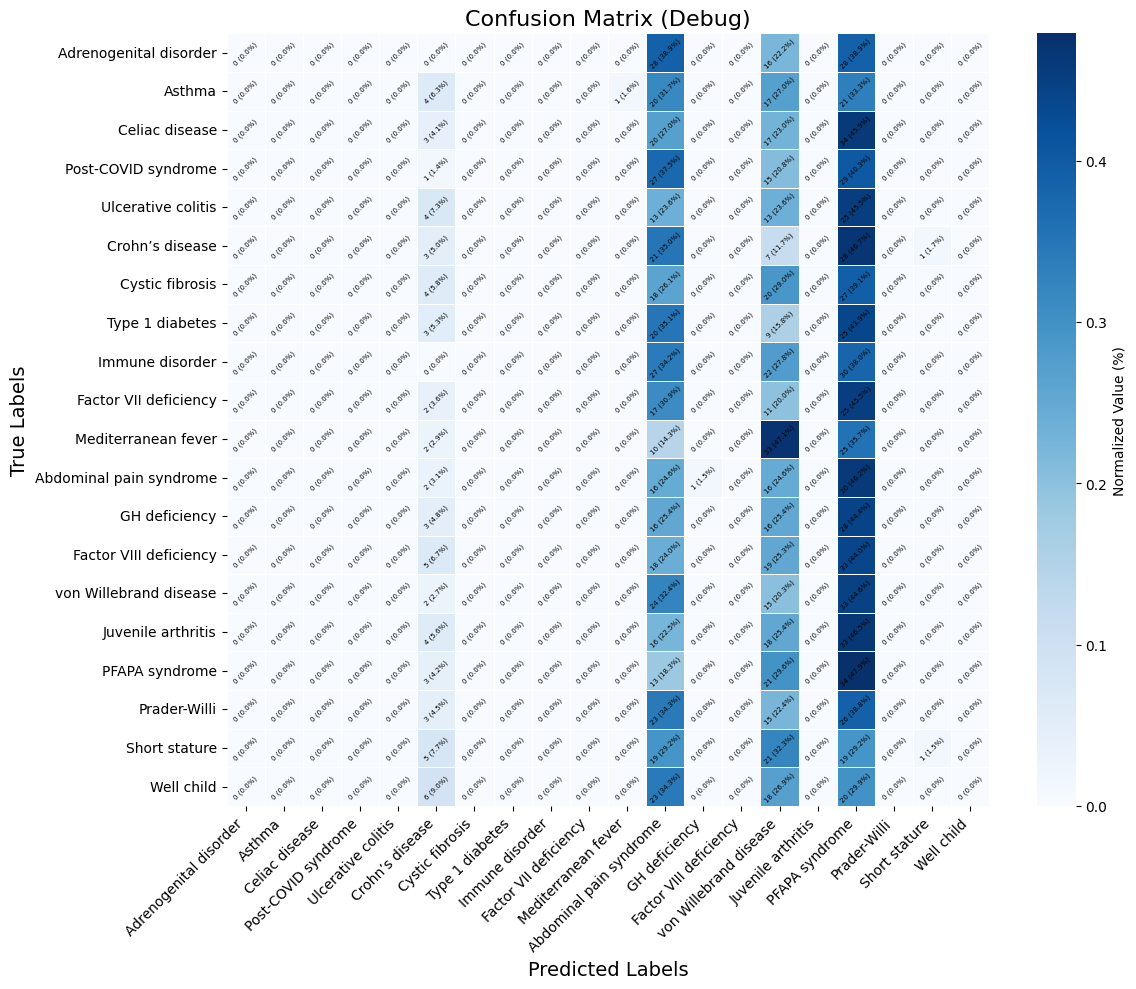

Confusion matrix saved to ./scivias_opt//confusion_matrix_debug.jpg


In [12]:
train_stats,train_auc_roc = evaluate(data_loader_train, model, 'cuda',args.task,0, mode='debug',num_class=args.nb_classes)


In [13]:
data_loader = data_loader_train
model = model
device = 'cuda'
task = args.task
epoch = 0
mode = 'debug'
num_class = args.nb_classes


In [16]:
criterion = torch.nn.CrossEntropyLoss()

metric_logger = misc.MetricLogger(delimiter="  ")
header = 'Test:'

if not os.path.exists(task):
    os.makedirs(task)

prediction_decode_list = []
prediction_list = []
true_label_decode_list = []
true_label_onehot_list = []

# switch to evaluation mode
model.eval()

for batch in metric_logger.log_every(data_loader, 10, header):
    images = batch[0]
    target = batch[-1]
    images = images.to(device, non_blocking=True)
    target = target.to(device, non_blocking=True)
    true_label=F.one_hot(target.to(torch.int64), num_classes=num_class)

    # compute output
    with torch.cuda.amp.autocast():
        output = model(images)
        loss = criterion(output, target)
        prediction_softmax = nn.Softmax(dim=1)(output)
        _,prediction_decode = torch.max(prediction_softmax, 1)
        _,true_label_decode = torch.max(true_label, 1)

        prediction_decode_list.extend(prediction_decode.cpu().detach().numpy())
        true_label_decode_list.extend(true_label_decode.cpu().detach().numpy())
        true_label_onehot_list.extend(true_label.cpu().detach().numpy())
        prediction_list.extend(prediction_softmax.cpu().detach().numpy())

    acc1,_ = accuracy(output, target, topk=(1,2))

    batch_size = images.shape[0]
    metric_logger.update(loss=loss.item())
    metric_logger.meters['acc1'].update(acc1.item(), n=batch_size)

/data/core-kind/fatemeh/miniconda3/envs/retfound/lib/python3.7/site-packages/torchvision/transforms/functional.py:443: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  "Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. "
/data/core-kind/fatemeh/miniconda3/envs/retfound/lib/python3.7/site-packages/torchvision/transforms/functional.py:443: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  "Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. "
/data/core-kind/fatemeh/miniconda3/envs/retfound/lib/python3.7/site-packages/torchvision/transforms/functional.py:443: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  "Argument 'interpolation' of typ

Test:  [ 0/84]  eta: 0:04:27  loss: 2.9961 (2.9961)  acc1: 0.0000 (0.0000)  time: 3.1897  data: 2.6336  max mem: 5799
Test:  [10/84]  eta: 0:00:30  loss: 2.9960 (2.9959)  acc1: 0.0000 (3.4091)  time: 0.4057  data: 0.2537  max mem: 10426
Test:  [20/84]  eta: 0:00:16  loss: 2.9958 (2.9959)  acc1: 6.2500 (5.6548)  time: 0.1147  data: 0.0110  max mem: 10429
Test:  [30/84]  eta: 0:00:11  loss: 2.9958 (2.9959)  acc1: 6.2500 (5.0403)  time: 0.1041  data: 0.0100  max mem: 10429
Test:  [40/84]  eta: 0:00:08  loss: 2.9958 (2.9959)  acc1: 6.2500 (4.7256)  time: 0.1074  data: 0.0107  max mem: 10429
Test:  [50/84]  eta: 0:00:05  loss: 2.9958 (2.9959)  acc1: 0.0000 (4.4118)  time: 0.1098  data: 0.0094  max mem: 10429
Test:  [60/84]  eta: 0:00:03  loss: 2.9960 (2.9959)  acc1: 0.0000 (4.5082)  time: 0.1065  data: 0.0093  max mem: 10429
Test:  [70/84]  eta: 0:00:02  loss: 2.9960 (2.9959)  acc1: 6.2500 (4.7535)  time: 0.0909  data: 0.0048  max mem: 10429
Test:  [80/84]  eta: 0:00:00  loss: 2.9958 (2.995

In [35]:
output = model(images)
images.shape, output.shape

(torch.Size([16, 3, 224, 224]), torch.Size([16, 20]))

In [17]:
true_label_decode_list = np.array(true_label_decode_list)
prediction_decode_list = np.array(prediction_decode_list)
confusion_matrix = multilabel_confusion_matrix(true_label_decode_list, prediction_decode_list,labels=[i for i in range(num_class)])

In [18]:
true_label_decode_list

array([17,  0,  9, ...,  9, 16,  3])

In [19]:
set(prediction_decode_list)

{2, 5, 10, 11, 12, 14, 16, 18}

In [20]:
(true_label_decode_list == prediction_decode_list).sum() / len(true_label_decode_list)

0.04538690476190476

In [21]:
confusion_matrix = multilabel_confusion_matrix(true_label_decode_list, prediction_decode_list,labels=[i for i in range(num_class)])
acc, sensitivity, specificity, precision, G, F1, mcc = misc_measures(confusion_matrix)

/data/core-kind/fatemeh/codes/RETFound_MAE/engine_finetune.py:43: RuntimeWarning: invalid value encountered in double_scalars
  precision_ = 1.*cm1[1,1]/(cm1[1,1]+cm1[0,1])
/data/core-kind/fatemeh/codes/RETFound_MAE/engine_finetune.py:47: RuntimeWarning: invalid value encountered in true_divide
  mcc = (cm1[0,0]*cm1[1,1]-cm1[0,1]*cm1[1,0])/np.sqrt((cm1[0,0]+cm1[0,1])*(cm1[0,0]+cm1[1,0])*(cm1[1,1]+cm1[1,0])*(cm1[1,1]+cm1[0,1]))
/data/core-kind/fatemeh/codes/RETFound_MAE/engine_finetune.py:46: RuntimeWarning: invalid value encountered in double_scalars
  F1_score_2.append(2*precision_*sensitivity_/(precision_+sensitivity_))


In [22]:
acc1

tensor(0., device='cuda:0')

In [23]:
y_true = true_label_decode_list
y_pred = prediction_decode_list

In [24]:
from sklearn.metrics import accuracy_score, hamming_loss, multilabel_confusion_matrix

# Subset Accuracy
subset_acc = accuracy_score(y_true, y_pred)
print("Subset Accuracy:", subset_acc)

# Hamming Loss and Hamming Accuracy
hamming = hamming_loss(y_true, y_pred)
hamming_acc = 1 - hamming
print("Hamming Accuracy:", hamming_acc)

# Sample-Based Accuracy
sample_acc = np.mean([np.sum(np.logical_and(t, p)) / np.sum(np.logical_or(t, p)) for t, p in zip(y_true, y_pred)])
print("Sample Accuracy:", sample_acc)

Subset Accuracy: 0.04538690476190476
Hamming Accuracy: 0.04538690476190477
Sample Accuracy: 0.953125


In [26]:
import my_vis
import importlib
importlib.reload(my_vis)
from my_vis import plot_confusion_matrix_with_counts

5


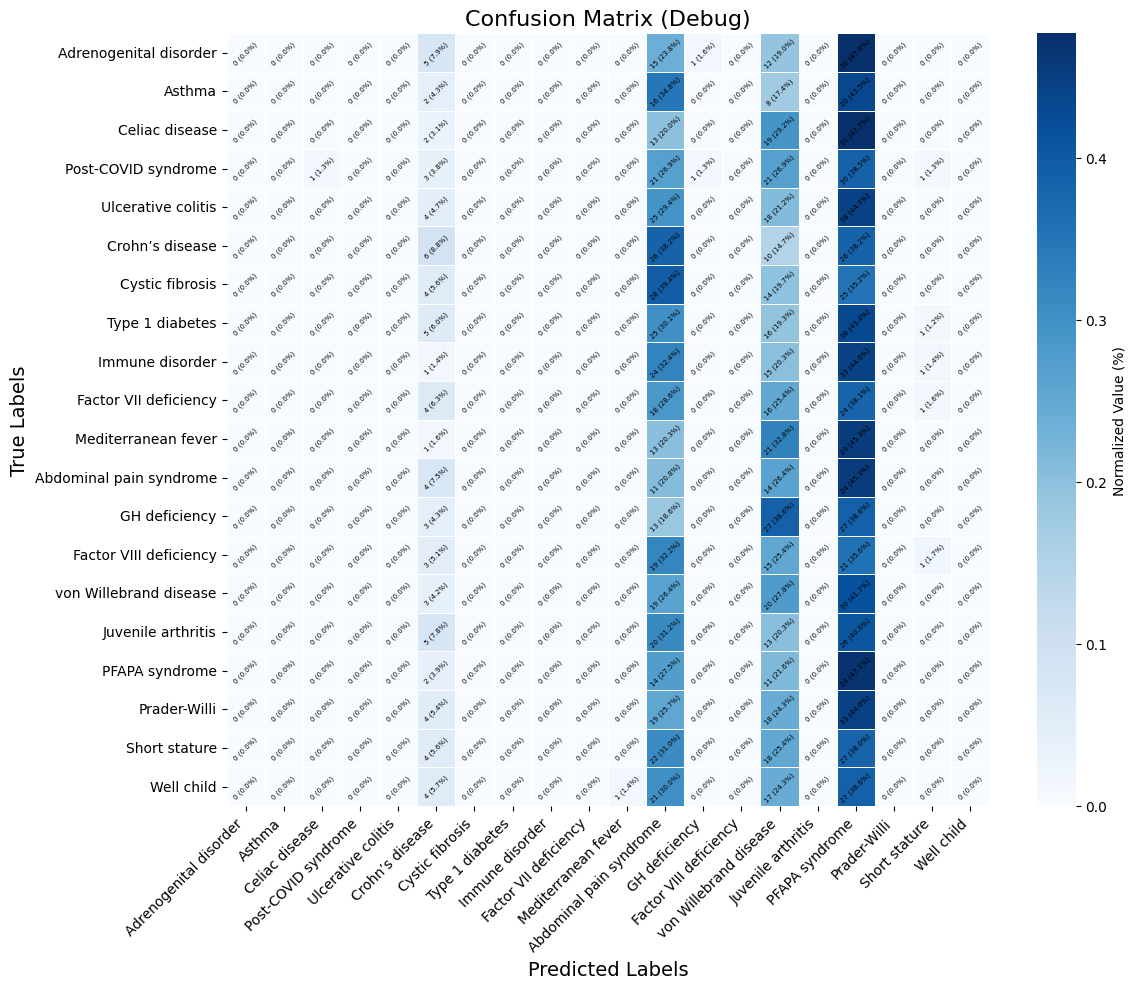

Confusion matrix saved to ./scivias_opt//confusion_matrix_debug.jpg


In [27]:
plot_confusion_matrix_with_counts(data_loader, true_label_decode_list, prediction_decode_list, task, mode)


# check loss function

In [30]:
mixup_active = args.mixup > 0 or args.cutmix > 0. or args.cutmix_minmax is not None
mixup_active

False

In [31]:
args.smoothing

0.1

In [32]:
args.distributed

AttributeError: 'Namespace' object has no attribute 'distributed'

In [33]:
model

VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 1024, kernel_size=(16, 16), stride=(16, 16))
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (blocks): ModuleList(
    (0): Block(
      (norm1): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=1024, out_features=3072, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=1024, out_features=1024, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (drop_path): Identity()
      (norm2): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=1024, out_features=4096, bias=True)
        (act): GELU(approximate='none')
        (fc2): Linear(in_features=4096, out_features=1024, bias=True)
        (drop): Dropout(p=0.0, inplace=False)
      )
    )
    (1): Block(
      (norm1): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
      (

# debug job names

In [1]:
import os
import subprocess
import itertools
result = subprocess.run(
                ["squeue", "--user", 'e-helmholtz', "--format", "%.200j"],
                stdout=subprocess.PIPE,
                stderr=subprocess.PIPE,
                text=True,
            )

In [9]:
result.returncode != 0

False

In [10]:
# Check for errors
if result.returncode != 0:
    print(f"Error: {result.stderr}")

# Split the output into lines, strip leading and trailing whitespaces
lines = [line.strip() for line in result.stdout.splitlines()]
lines

['NAME', 'jupyter_job', 'retfound', 'retfound_mode_op', 'retfound_mode_op']